In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

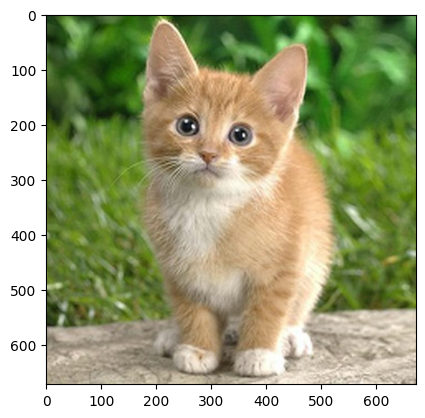

In [59]:
# Load and display image
img = cv2.imread('test.jpg')
img = img.astype(int)
img2 = img[:,:,::-1] # Flips RGB dimensions for displaying
plt.imshow(img2)
plt.show()

In [60]:
# x and y derivatives of image
derivative_img_x = (img[:, 2:, :] - img[:, :img.shape[1] - 2, :]) / 2
derivative_img_y = (img[2:, :, :] - img[:img.shape[0] - 2, :, :]) / 2

In [61]:
# Put in range [0, 1] and display
derivative_img_x_2 = ((derivative_img_x - np.min(derivative_img_x)) / 255)
derivative_img_y_2 = ((derivative_img_y - np.min(derivative_img_y)) / 255)

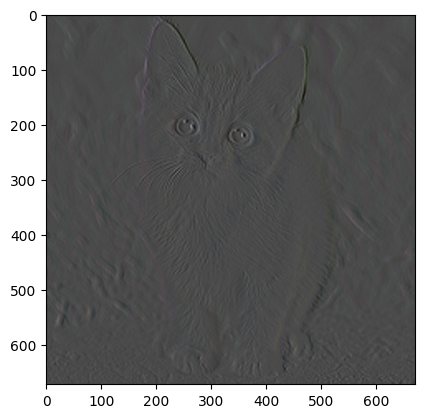

In [62]:
# Show cat
plt.imshow(derivative_img_x_2)
plt.show()

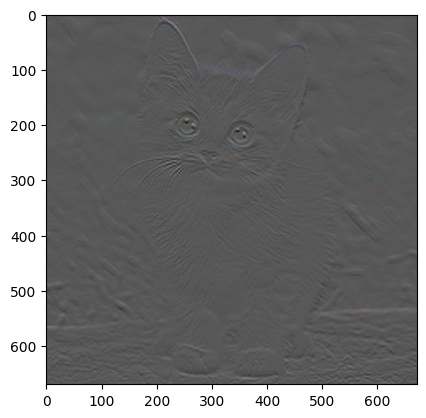

In [63]:
# Show cat again
plt.imshow(derivative_img_y_2)
plt.show()

In [64]:
# Compute average derivative over all color channels at each pixel
deriv_magnitude_x = np.sqrt(derivative_img_x[:, :, 0] ** 2 + derivative_img_x[:, :, 1] ** 2 + derivative_img_x[:, :, 2] ** 2)
deriv_magnitude_y = np.sqrt(derivative_img_y[:, :, 0] ** 2 + derivative_img_y[:, :, 1] ** 2 + derivative_img_y[:, :, 2] ** 2)

deriv_magnitude_x = np.round(np.abs(deriv_magnitude_x[:, :, None] / 3)).astype(int)
deriv_magnitude_y = np.round(np.abs(deriv_magnitude_y[:, :, None] / 3)).astype(int)

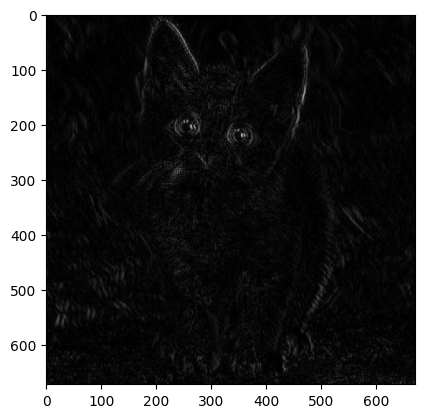

In [65]:
plt.imshow(deriv_magnitude_x, cmap='gray')
plt.show()

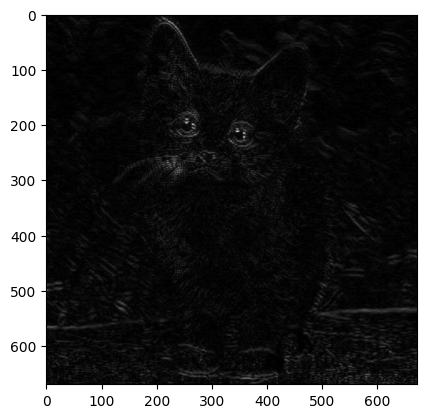

In [66]:
plt.imshow(deriv_magnitude_y, cmap='gray')
plt.show()

In [67]:
# Approximate magnitude of gradient as the max between the magnitude of the derivative along the X and Y axes
grad_magnitude = np.maximum(deriv_magnitude_x[1:img.shape[0] - 1, :, :], deriv_magnitude_y[:,  1:img.shape[1] - 1, :])

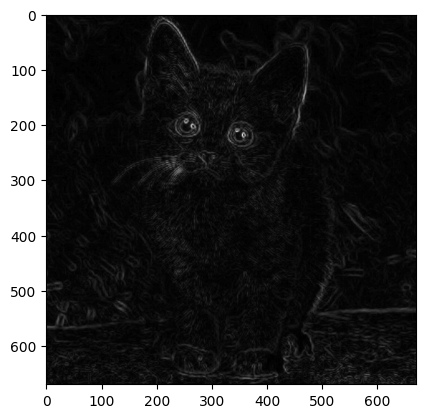

In [68]:
plt.imshow(grad_magnitude, cmap='gray')
plt.show()

In [69]:
# Compute histogram for each of the above images to compute Shannon entropy
hist = [0] * 256

h = []
for i in range(img.shape[0] - 2):
    for j in range(img.shape[1] - 2):
        hist[grad_magnitude[i][j][0]] += 1
        h.append(grad_magnitude[i][j][0])

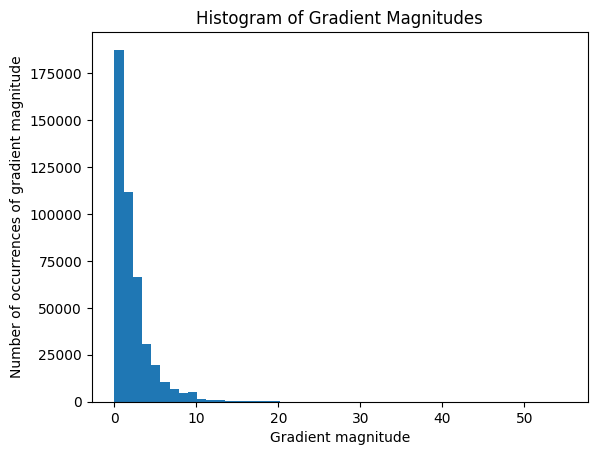

In [70]:
plt.hist(h, len([i for i in hist if not i == 0]))
plt.title("Histogram of Gradient Magnitudes")
plt.ylabel("Number of occurrences of gradient magnitude")
plt.xlabel("Gradient magnitude")
plt.show()

In [71]:
# Compute entropy of histograms
entropy = 0

# Total number of pixels
total_pixels = img.shape[0] * img.shape[1]

for i in range(256):
    # Probability of a pixel having the gradient magnitude value i for histogram
    p = hist[i] / total_pixels

    # Shannon entropy formula
    if not p == 0: 
        entropy -= p * math.log(p, 2)

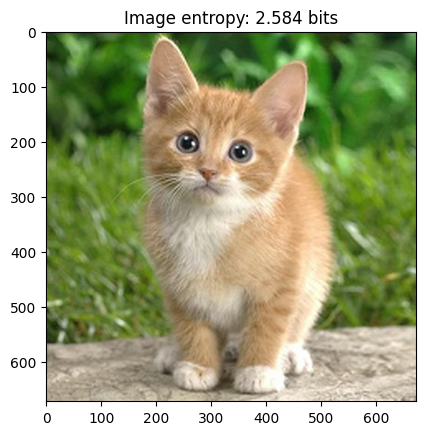

In [72]:
plt.title("Image entropy: " + str(round(entropy, 3)) + " bits") 
plt.imshow(img2)
plt.show()

In [79]:
intensity = (np.sum(img, axis=2)[:, :, None] / 3).astype(int)

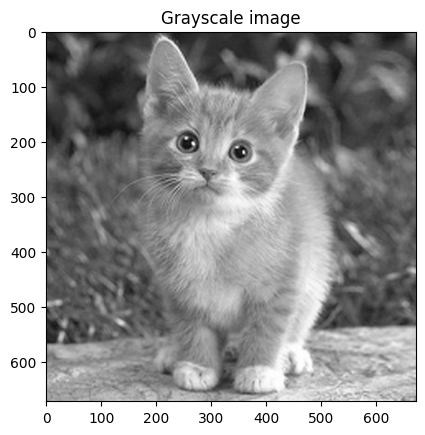

In [80]:
plt.imshow(intensity, cmap='gray')
plt.title("Grayscale image")
plt.show()

In [83]:
# Compute histogram for each of the above images to compute Shannon entropy
hist = [0] * 256

h = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[intensity[i][j][0]] += 1
        h.append(intensity[i][j][0])

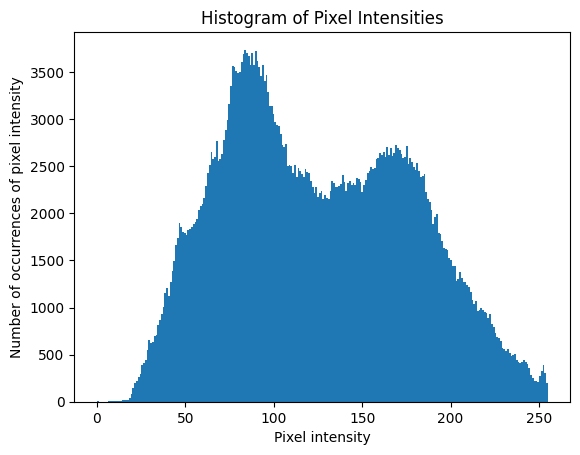

In [85]:
plt.hist(h, len([i for i in hist if not i == 0]))
plt.title("Histogram of Pixel Intensities")
plt.ylabel("Number of occurrences of pixel intensity")
plt.xlabel("Pixel intensity")
plt.show()

In [86]:
# Compute entropy of histograms
entropy = 0

# Total number of pixels
total_pixels = img.shape[0] * img.shape[1]

for i in range(256):
    # Probability of a pixel having the gradient magnitude value i for histogram
    p = hist[i] / total_pixels

    # Shannon entropy formula
    if not p == 0: 
        entropy -= p * math.log(p, 2)

In [87]:
entropy

7.658596405464403